In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def recuperaPixel(imagem, centro, x, y):
    novoValor = 0
    try:
        if imagem[x][y] >= centro:
            novoValor = 1
    except:
        pass
    
    return novoValor

In [3]:
def padraoBinarioLocal(imagem, x, y):
    centro = imagem[x][y]
    valores = []
    
    valores.append(recuperaPixel(imagem, centro, x-1, y+1))
    valores.append(recuperaPixel(imagem, centro, x, y+1))
    valores.append(recuperaPixel(imagem, centro, x+1, y+1))
    valores.append(recuperaPixel(imagem, centro, x+1, y))
    valores.append(recuperaPixel(imagem, centro, x+1, y-1))
    valores.append(recuperaPixel(imagem, centro, x, y-1))
    valores.append(recuperaPixel(imagem, centro, x-1, y-1))
    valores.append(recuperaPixel(imagem, centro, x-1, y))
    
    valoresPotencia = [1, 2, 4, 8, 16, 32, 64, 128]
    valor = 0
    
    for i in range(len(valores)):
        valor += valores[i] * valoresPotencia[i]
        
    return valor

In [4]:
def plotaGraficos(saidas, plotaHistograma):
    figure = plt.figure()
    
    if (plotaHistograma):
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,5))

        ax1.imshow(saidas[0]["imagem"], cmap = plt.get_cmap('gray'))
        ax1.set_title(saidas[0]["titulo"])
        ax1.set_xticks(saidas[0]["marcacaoX"])
        ax1.set_yticks(saidas[0]["marcacaoY"])
        ax1.set_xlabel(saidas[0]["tituloEixoX"])
        ax1.set_ylabel(saidas[0]["tituloEixoY"])   

        ax2.imshow(saidas[1]["imagem"], cmap = plt.get_cmap('gray'))
        ax2.set_title(saidas[1]["titulo"])
        ax2.set_xticks(saidas[1]["marcacaoX"])
        ax2.set_yticks(saidas[1]["marcacaoY"])
        ax2.set_xlabel(saidas[1]["tituloEixoX"])
        ax2.set_ylabel(saidas[1]["tituloEixoY"])     

        ax3.plot(saidas[2]["imagem"], color = "purple")
        ax3.set_xlim([0,260])
        ax3.set_title(saidas[2]["titulo"])
        ax3.set_xlabel(saidas[2]["tituloEixoX"])
        ax3.set_ylabel(saidas[2]["tituloEixoY"])            
        ytick_list = [int(i) for i in ax3.get_yticks()]
        ax3.set_yticklabels(ytick_list, rotation = 90)
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
        
        ax1.imshow(saidas[0]["imagem"], cmap = plt.get_cmap('gray'))
        ax1.set_title(saidas[0]["titulo"])
        ax1.set_xticks(saidas[0]["marcacaoX"])
        ax1.set_yticks(saidas[0]["marcacaoY"])
        ax1.set_xlabel(saidas[0]["tituloEixoX"])
        ax1.set_ylabel(saidas[0]["tituloEixoY"])   

        ax2.imshow(saidas[1]["imagem"], cmap = plt.get_cmap('gray'))
        ax2.set_title(saidas[1]["titulo"])
        ax2.set_xticks(saidas[1]["marcacaoX"])
        ax2.set_yticks(saidas[1]["marcacaoY"])
        ax2.set_xlabel(saidas[1]["tituloEixoX"])
        ax2.set_ylabel(saidas[1]["tituloEixoY"])     

    plt.show()

<Figure size 432x288 with 0 Axes>

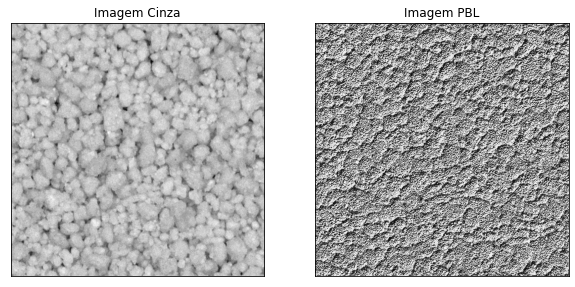

In [5]:
imagem_BGR1 = cv2.imread('imagens/textura1.png')
imagem_cinza1 = cv2.cvtColor(imagem_BGR1, cv2.COLOR_BGR2GRAY)

altura, largura, canal = imagem_BGR1.shape

imagem_PBL1 = np.zeros((altura, largura, 3), np.uint8)

for i in range(0, altura):
    for j in range(0, largura):
         imagem_PBL1[i, j] = padraoBinarioLocal(imagem_cinza1, i, j)
            
histograma1 = cv2.calcHist([imagem_PBL1], [0], None, [256], [0, 256])

saidas = []

saidas.append({
    "imagem": imagem_cinza1,
    "tituloEixoX": "",
    "tituloEixoY": "",
    "marcacaoX": [],
    "marcacaoY": [],
    "titulo": "Imagem Cinza",
})
saidas.append({
    "imagem": imagem_PBL1,
    "tituloEixoX": "",
    "tituloEixoY": "",
    "marcacaoX": [],
    "marcacaoY": [],
    "titulo": "Imagem PBL",
})    
saidas.append({
    "imagem": histograma1,
    "tituloEixoX": "Bins",
    "tituloEixoY": "Número de pixels",
    "marcacaoX": None,
    "marcacaoY": None,
    "titulo": "Histograma(PBL)",
})

plotaGraficos(saidas, False)

<Figure size 432x288 with 0 Axes>

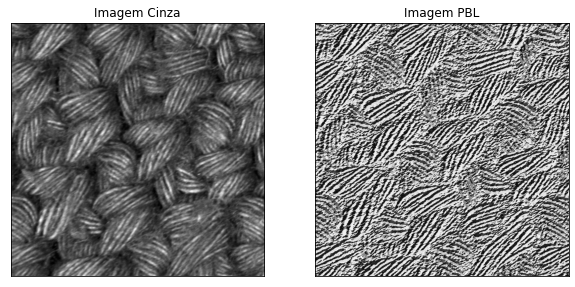

In [6]:
imagem_BGR2 = cv2.imread('imagens/textura2.png')
imagem_cinza2 = cv2.cvtColor(imagem_BGR2, cv2.COLOR_BGR2GRAY)

altura, largura, canal = imagem_BGR2.shape

imagem_PBL2 = np.zeros((altura, largura, 3), np.uint8)

for i in range(0, altura):
    for j in range(0, largura):
         imagem_PBL2[i, j] = padraoBinarioLocal(imagem_cinza2, i, j)
            
histograma2 = cv2.calcHist([imagem_PBL2], [0], None, [256], [0, 256])

saidas = []

saidas.append({
    "imagem": imagem_cinza2,
    "tituloEixoX": "",
    "tituloEixoY": "",
    "marcacaoX": [],
    "marcacaoY": [],
    "titulo": "Imagem Cinza",
})
saidas.append({
    "imagem": imagem_PBL2,
    "tituloEixoX": "",
    "tituloEixoY": "",
    "marcacaoX": [],
    "marcacaoY": [],
    "titulo": "Imagem PBL",
})    
saidas.append({
    "imagem": histograma2,
    "tituloEixoX": "Bins",
    "tituloEixoY": "Número de pixels",
    "marcacaoX": None,
    "marcacaoY": None,
    "titulo": "Histograma(PBL)",
})

plotaGraficos(saidas, False)

<Figure size 432x288 with 0 Axes>

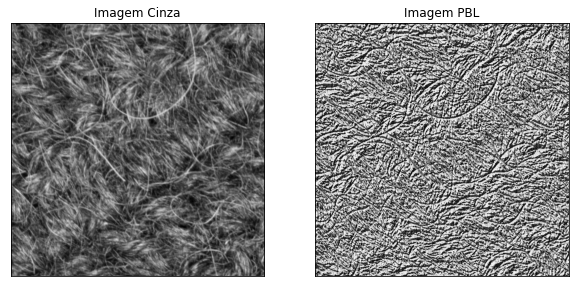

In [7]:
imagem_BGR3 = cv2.imread('imagens/textura3.png')
imagem_cinza3 = cv2.cvtColor(imagem_BGR3, cv2.COLOR_BGR2GRAY)

altura, largura, canal = imagem_BGR3.shape

imagem_PBL3 = np.zeros((altura, largura, 3), np.uint8)

for i in range(0, altura):
    for j in range(0, largura):
         imagem_PBL3[i, j] = padraoBinarioLocal(imagem_cinza3, i, j)
            
histograma3 = cv2.calcHist([imagem_PBL3], [0], None, [256], [0, 256])

saidas = []

saidas.append({
    "imagem": imagem_cinza3,
    "tituloEixoX": "",
    "tituloEixoY": "",
    "marcacaoX": [],
    "marcacaoY": [],
    "titulo": "Imagem Cinza",
})
saidas.append({
    "imagem": imagem_PBL3,
    "tituloEixoX": "",
    "tituloEixoY": "",
    "marcacaoX": [],
    "marcacaoY": [],
    "titulo": "Imagem PBL",
})    
saidas.append({
    "imagem": histograma3,
    "tituloEixoX": "Bins",
    "tituloEixoY": "Número de pixels",
    "marcacaoX": None,
    "marcacaoY": None,
    "titulo": "Histograma(PBL)",
})

plotaGraficos(saidas, False)

<Figure size 432x288 with 0 Axes>

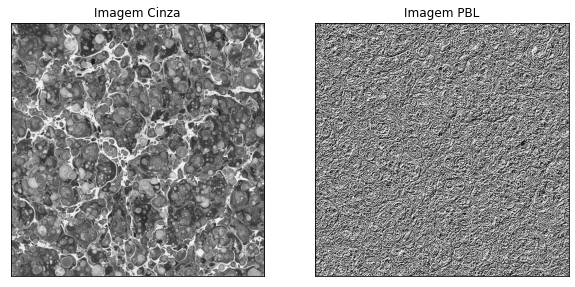

In [8]:
imagem_BGR4 = cv2.imread('imagens/textura4.png')
imagem_cinza4 = cv2.cvtColor(imagem_BGR4, cv2.COLOR_BGR2GRAY)

altura, largura, canal = imagem_BGR4.shape

imagem_PBL4 = np.zeros((altura, largura, 3), np.uint8)

for i in range(0, altura):
    for j in range(0, largura):
         imagem_PBL4[i, j] = padraoBinarioLocal(imagem_cinza4, i, j)
            
histograma4 = cv2.calcHist([imagem_PBL4], [0], None, [256], [0, 256])

saidas = []

saidas.append({
    "imagem": imagem_cinza4,
    "tituloEixoX": "",
    "tituloEixoY": "",
    "marcacaoX": [],
    "marcacaoY": [],
    "titulo": "Imagem Cinza",
})
saidas.append({
    "imagem": imagem_PBL4,
    "tituloEixoX": "",
    "tituloEixoY": "",
    "marcacaoX": [],
    "marcacaoY": [],
    "titulo": "Imagem PBL",
})    
saidas.append({
    "imagem": histograma4,
    "tituloEixoX": "Bins",
    "tituloEixoY": "Número de pixels",
    "marcacaoX": None,
    "marcacaoY": None,
    "titulo": "Histograma(PBL)",
})

plotaGraficos(saidas, False)

<ipython-input-4-1a13237c7814>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ytick_list, rotation = 90)


<Figure size 432x288 with 0 Axes>

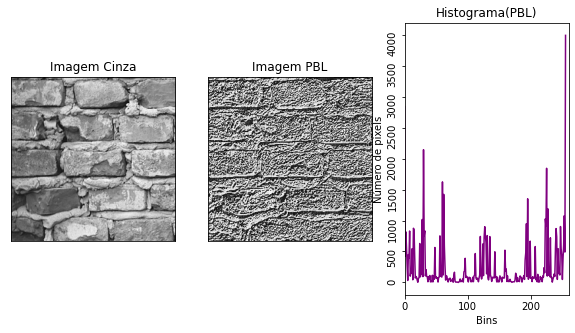

In [9]:
imagem_BGR5 = cv2.imread('imagens/textura5.png')
imagem_cinza5 = cv2.cvtColor(imagem_BGR5, cv2.COLOR_BGR2GRAY)

altura, largura, canal = imagem_BGR5.shape

imagem_PBL5 = np.zeros((altura, largura, 3), np.uint8)

for i in range(0, altura):
    for j in range(0, largura):
         imagem_PBL5[i, j] = padraoBinarioLocal(imagem_cinza5, i, j)
            
histograma5 = cv2.calcHist([imagem_PBL5], [0], None, [256], [0, 256])

saidas = []

saidas.append({
    "imagem": imagem_cinza5,
    "tituloEixoX": "",
    "tituloEixoY": "",
    "marcacaoX": [],
    "marcacaoY": [],
    "titulo": "Imagem Cinza",
})
saidas.append({
    "imagem": imagem_PBL5,
    "tituloEixoX": "",
    "tituloEixoY": "",
    "marcacaoX": [],
    "marcacaoY": [],
    "titulo": "Imagem PBL",
})    
saidas.append({
    "imagem": histograma5,
    "tituloEixoX": "Bins",
    "tituloEixoY": "Número de pixels",
    "marcacaoX": None,
    "marcacaoY": None,
    "titulo": "Histograma(PBL)",
})

plotaGraficos(saidas, True)

<ipython-input-4-1a13237c7814>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(ytick_list, rotation = 90)


<Figure size 432x288 with 0 Axes>

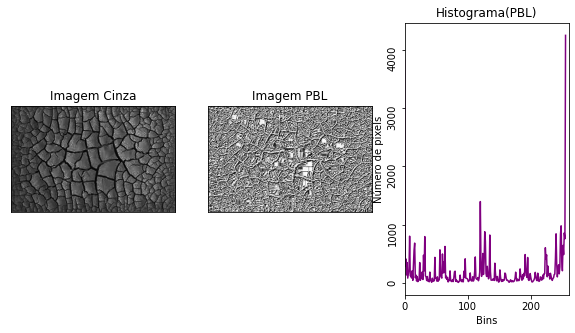

In [10]:
imagem_BGR6 = cv2.imread('imagens/textura6.png')
imagem_cinza6 = cv2.cvtColor(imagem_BGR6, cv2.COLOR_BGR2GRAY)

altura, largura, canal = imagem_BGR6.shape

imagem_PBL6 = np.zeros((altura, largura, 3), np.uint8)

for i in range(0, altura):
    for j in range(0, largura):
         imagem_PBL6[i, j] = padraoBinarioLocal(imagem_cinza6, i, j)
            
histograma6 = cv2.calcHist([imagem_PBL6], [0], None, [256], [0, 256])

saidas = []

saidas.append({
    "imagem": imagem_cinza6,
    "tituloEixoX": "",
    "tituloEixoY": "",
    "marcacaoX": [],
    "marcacaoY": [],
    "titulo": "Imagem Cinza",
})
saidas.append({
    "imagem": imagem_PBL6,
    "tituloEixoX": "",
    "tituloEixoY": "",
    "marcacaoX": [],
    "marcacaoY": [],
    "titulo": "Imagem PBL",
})    
saidas.append({
    "imagem": histograma6,
    "tituloEixoX": "Bins",
    "tituloEixoY": "Número de pixels",
    "marcacaoX": None,
    "marcacaoY": None,
    "titulo": "Histograma(PBL)",
})

plotaGraficos(saidas, True)

In [11]:
cv2.compareHist(histograma5, histograma6, cv2.HISTCMP_BHATTACHARYYA)

0.23945945839868693

In [12]:
cv2.compareHist(histograma5, histograma6, cv2.HISTCMP_CHISQR)

26372.002003415786

In [13]:
cv2.compareHist(histograma5, histograma6, cv2.HISTCMP_INTERSECT)

41558.0

In [14]:
cv2.compareHist(histograma5, histograma6, cv2.HISTCMP_CORREL)

0.8272689607989974